## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.
C:\Users\195313\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\195313\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\195313\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\195313\Anaconda3\lib\site-packages\tensorflow\python\framework\dtype

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [10]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========

50000/50000 [==============================] - 4s 74us/step - loss: 1.4687 - accuracy: 0.4829 - val_loss: 1.6344 - val_accuracy: 0.4266
Epoch 50/50
50000/50000 [==============================] - 4s 74us/step - loss: 1.4575 - accuracy: 0.4886 - val_loss: 1.7823 - val_accuracy: 0.3970
Experiment with LR = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (D

50000/50000 [==============================] - 4s 75us/step - loss: 0.4276 - accuracy: 0.8469 - val_loss: 2.0875 - val_accuracy: 0.5267
Epoch 48/50
50000/50000 [==============================] - 4s 74us/step - loss: 0.3920 - accuracy: 0.8582 - val_loss: 2.1831 - val_accuracy: 0.5285
Epoch 49/50
50000/50000 [==============================] - 4s 75us/step - loss: 0.3885 - accuracy: 0.8606 - val_loss: 2.3177 - val_accuracy: 0.5143
Epoch 50/50
50000/50000 [==============================] - 4s 74us/step - loss: 0.3724 - accuracy: 0.8662 - val_loss: 2.3517 - val_accuracy: 0.5104
Experiment with LR = 0.001000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
___________________________________________

50000/50000 [==============================] - 4s 73us/step - loss: 0.9178 - accuracy: 0.6780 - val_loss: 1.5571 - val_accuracy: 0.5009
Epoch 46/50
50000/50000 [==============================] - 4s 73us/step - loss: 0.9051 - accuracy: 0.6842 - val_loss: 1.3793 - val_accuracy: 0.5325
Epoch 47/50
50000/50000 [==============================] - 4s 74us/step - loss: 0.8936 - accuracy: 0.6874 - val_loss: 1.4147 - val_accuracy: 0.5272
Epoch 48/50
50000/50000 [==============================] - 4s 73us/step - loss: 0.8826 - accuracy: 0.6882 - val_loss: 1.5138 - val_accuracy: 0.5026
Epoch 49/50
50000/50000 [==============================] - 4s 73us/step - loss: 0.8705 - accuracy: 0.6967 - val_loss: 1.3821 - val_accuracy: 0.5352
Epoch 50/50
50000/50000 [==============================] - 4s 73us/step - loss: 0.8556 - accuracy: 0.6999 - val_loss: 1.4377 - val_accuracy: 0.5285
Experiment with LR = 0.000100
Model: "model_1"
_________________________________________________________________
Layer (type

50000/50000 [==============================] - 4s 75us/step - loss: 1.5788 - accuracy: 0.4494 - val_loss: 1.5916 - val_accuracy: 0.4414
Epoch 44/50
50000/50000 [==============================] - 4s 74us/step - loss: 1.5745 - accuracy: 0.4511 - val_loss: 1.5883 - val_accuracy: 0.4407
Epoch 45/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.5694 - accuracy: 0.4530 - val_loss: 1.5838 - val_accuracy: 0.4426
Epoch 46/50
50000/50000 [==============================] - 4s 74us/step - loss: 1.5654 - accuracy: 0.4555 - val_loss: 1.5796 - val_accuracy: 0.4453
Epoch 47/50
50000/50000 [==============================] - 4s 73us/step - loss: 1.5612 - accuracy: 0.4560 - val_loss: 1.5759 - val_accuracy: 0.4463
Epoch 48/50
50000/50000 [==============================] - 4s 73us/step - loss: 1.5568 - accuracy: 0.4577 - val_loss: 1.5753 - val_accuracy: 0.4448
Epoch 49/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.5533 - accuracy: 0.4575 - val_loss: 1.5693

50000/50000 [==============================] - 4s 74us/step - loss: 1.9657 - accuracy: 0.3177 - val_loss: 1.9618 - val_accuracy: 0.3197
Epoch 42/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.9615 - accuracy: 0.3178 - val_loss: 1.9580 - val_accuracy: 0.3212
Epoch 43/50
50000/50000 [==============================] - 4s 73us/step - loss: 1.9577 - accuracy: 0.3203 - val_loss: 1.9539 - val_accuracy: 0.3245
Epoch 44/50
50000/50000 [==============================] - 4s 74us/step - loss: 1.9538 - accuracy: 0.3213 - val_loss: 1.9502 - val_accuracy: 0.3259
Epoch 45/50
50000/50000 [==============================] - 4s 74us/step - loss: 1.9501 - accuracy: 0.3233 - val_loss: 1.9465 - val_accuracy: 0.3253
Epoch 46/50
50000/50000 [==============================] - 4s 74us/step - loss: 1.9464 - accuracy: 0.3239 - val_loss: 1.9429 - val_accuracy: 0.3281
Epoch 47/50
50000/50000 [==============================] - 4s 73us/step - loss: 1.9430 - accuracy: 0.3256 - val_loss: 1.9394

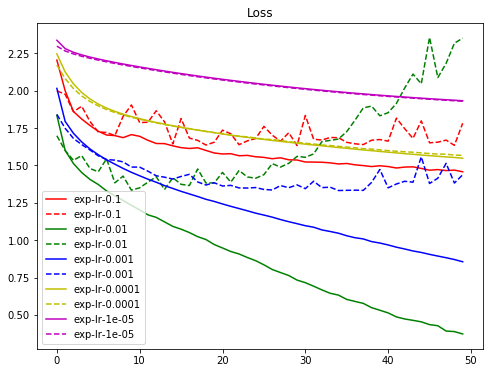

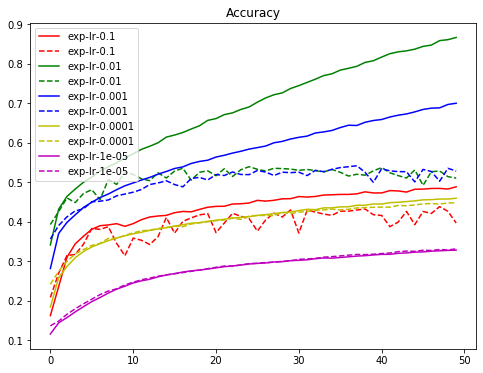

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()